![title](Image/passenser.jpg)

## 국제 항공사 승객 데이터

#### 선형회귀분석(Linear Regression)을 이용한 국제 항공사 승객 예측 문제
[데이터 다운로드](https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line)<br>
[소스 출처](http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

#### 데이터 설명

1 년 1 개월이 주어지면 국제선 승객 수를 1,000 명 단위로 예측하는 것이 문제.<br>
자료는 1949 년 1 월부터 1960 년 12 월까지, 또는 12 년 동안 144 회의 관찰을 통해 수집.

In [187]:
# 데이터 읽어오기
dataset = pandas.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

## 월별 태양 흑점 데이터

#### 선형회귀분석(Linear Regression)을 이용한 태양 흑점 예측 문제
[데이터 다운로드](https://datamarket.com/data/set/22ti/zuerich-monthly-sunspot-numbers-1749-1983#!ds=22ti&display=line)

#### 데이터 설명

230 년 (1749-1983 년) 동안 관찰 된 월별 태양 흑점 수<br>
단위는 카운트이며 2,820 회의 관측값이 있음.

In [169]:
# 데이터 읽어오기
dataset = pandas.read_csv('data/zuerich-monthly-sunspot-numbers-.csv', usecols=[1], engine='python', skipfooter=3)

In [188]:
import pandas
import matplotlib.pyplot as plt
import numpy
import math
from sklearn.metrics import mean_squared_error

In [189]:
dataset.head(5)

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [190]:
dataset.tail(5)

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,606
140,508
141,461
142,390
143,432


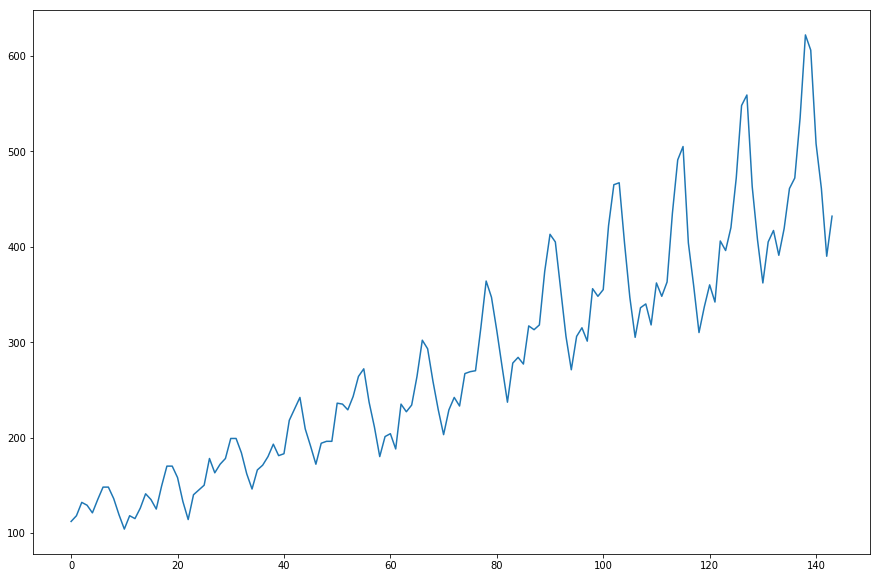

In [191]:
plt.clf()
plt.figure(figsize=(15, 10))
plt.plot(dataset)
plt.show()

In [192]:
# seed값을 고정한다.
numpy.random.seed(7)

In [193]:
dataset.head(5)

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [194]:
# 최대 최소 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [195]:
# 훈련데이터와 테스트 데이터 분리
# 관측치의 0.67%를 훈련데이터로, 나머지를 테스트 데이터로 활용
# 주의할점 : 시계열 데이터는 값의 순서가 중요하므로 임의 샘플링(random sampling)을 통한
# 데이터 분리는 피해야 한다

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [196]:
# 배열을 dataset matrix 형태로 바꾼다.
# X는 주어진 시간 (t)에 승객의 수이고 Y가 다음 시간 (t + 1)에 승객의 수인 데이터 세트를 생성
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [197]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [198]:
#회귀분석
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [199]:
# make predictions
trainPredict_lm = lm.predict(trainX)
testPredict_lm = lm.predict(testX)

In [200]:
# invert predictions
trainPredict_lm = scaler.inverse_transform(trainPredict_lm.reshape(-1, 1))
trainY = scaler.inverse_transform(trainY.reshape(-1, 1))
testPredict_lm = scaler.inverse_transform(testPredict_lm.reshape(-1, 1))
testY = scaler.inverse_transform(testY.reshape(-1, 1))

## 평균 제곱근 편차

평균 제곱근 편차(Root Mean Square Deviation; RMSD) 또는 평균 제곱근 오차(Root Mean Square Error; RMSE)는 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도이다. 정밀도(precision)를 표현하는데 적합하다. 각각의 차이값은 잔차(residual)라고도 하며, 평균 제곱근 편차는 잔차들을 하나의 측도로 종합할 때 사용된다.

In [201]:
# RME(root mean squared error) 계산
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict_lm))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict_lm))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.72 RMSE
Test Score: 48.76 RMSE


In [202]:
# 그래프를 그리기 위해 train data 예측값과 test data 예측값을 합친다
totalPredict_lm = numpy.append(trainPredict_lm, testPredict_lm)

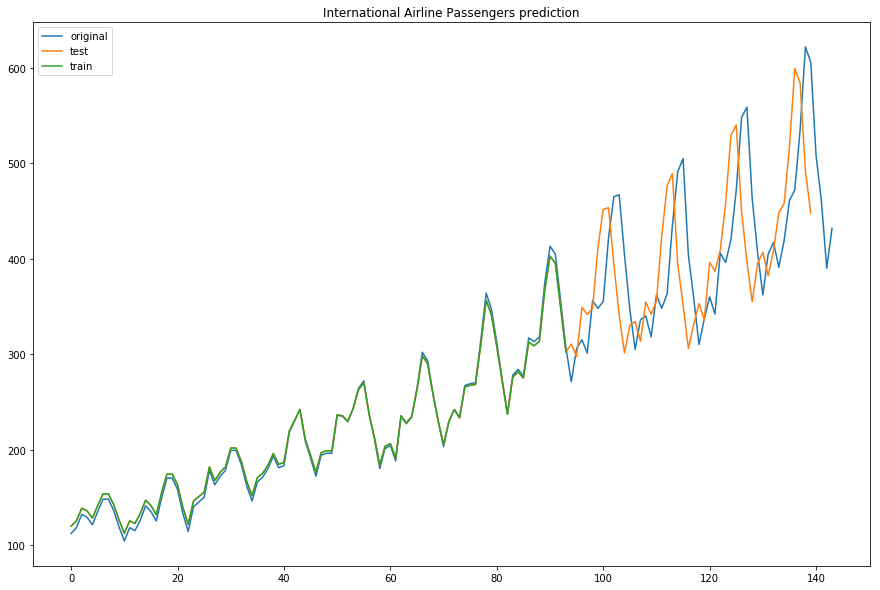

In [203]:
plt.clf()
plt.figure(figsize=(15, 10))
# plot baseline and predictions
plt.title('International Airline Passengers prediction')
plt.plot(scaler.inverse_transform(dataset), label='original')
plt.plot(totalPredict_lm, label='test')
plt.plot(trainPredict_lm, label='train')
plt.legend()
plt.show()